In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals Using the Normal Distribution

In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [8]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

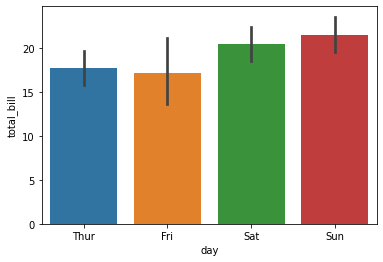

In [10]:
sns.barplot(x="day", y="total_bill", data=tips, ci=95);  ##günlere göre toplam faturalarin ortalamasi mean leri, seaborn ortalama ve üzerine siyah cubuklar koyuyor bunlar ci, güven araligi, 
                                                          #bunlari sample olarak kabul eder

3. Subset a dataframe just including Sunday tips

In [11]:
tipsSun = tips[tips['day'] == "Sun"]

In [12]:
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [13]:
tipsSun["total_bill"].mean()   #sample mean

21.41

In [14]:
tipsSun.shape   # pazar günü 76 tane

(76, 7)

5. Calculate standart error of the mean

In [15]:
sem = tipsSun["total_bill"].std() / np.sqrt(tipsSun.shape[0])   #hayali grafigin standart sapmasi standart error, sem standart error of the mean, best estimation 

In [16]:
sem

1.0131138555021968

6. Calculate the margin of error (95%)

In [17]:
moe = 1.96 * sem      #1.96 % 95 e göre, buna marjinal error denilir

In [18]:
moe

1.9857031567843058

7. Calculate the upper confidence limit

In [19]:
upper_lim=tipsSun["total_bill"].mean() + moe
upper_lim

23.395703156784307

8. Calculate the lower confidence limit

In [20]:
low_lim=tipsSun["total_bill"].mean() - moe
low_lim

19.424296843215693

In [21]:
#help(stats.norm.interval)

9. Calculate 95% Confidence Interval around the mean by using scipy.stats. 

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [22]:
stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = sem)  #ci yi bulma formülü, pratik yöntem

(19.424333330977177, 23.395666669022823)

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [23]:
n = 64   # 64 kisi
mu = 33    #ortalama 33
var = 256   #varyans
ci = 0.90
s = np.sqrt(var)       #bu sample in stdandart sapmasi, 

sem = s/np.sqrt(64)    #popülasyonun güven araligini bulacagiz, bu hayali grafigin std si

In [24]:
stats.norm.interval(0.90, loc = mu, scale = sem)   #ortalama loc olarak geciyor, %90 güven araliginda ana kütlenin ci si bu 2 aralik arasinda

(29.710292746097053, 36.28970725390295)

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [25]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [26]:
# Sample size
n = len(x)

# Sample mean
mu = np.mean(x)

# Sample standard deviation    # n-1 e bölünüyor(ddof)
s = np.std(x, ddof=1)

# Confidence level
cl = 0.95

In [27]:
stats.t.interval(cl, df=n-1, loc=mu, scale=s/np.sqrt(n))   #df=degrees of freedom

(2926.3202426713874, 2991.6797573286126)